# Visualizing Geographical Data

In [3]:
import pandas as pd
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
routes = pd.read_csv("routes.csv")

print(airports.iloc[0])
print(airlines.iloc[0])
print(routes.iloc[0])

id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object


In [5]:
# Creating new Basemap instance with parameters.

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(projection="merc",llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180)
print (m)

In [6]:
# Converting longitude and latitude values in airports from spherical to Cartesian coordinates.

m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

air_lists_lon = airports["longitude"].tolist()
air_lists_lat = airports["latitude"].tolist()

x, y = m(air_lists_lon, air_lists_lat)

/Users/milesmackenzie/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/milesmackenzie/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


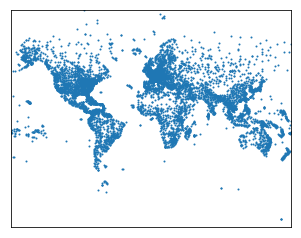

In [8]:
# Creating a scatter plot of the coordinates using basemap.scatter().


m.scatter(x,y,s=1)
plt.show()

/Users/milesmackenzie/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/milesmackenzie/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


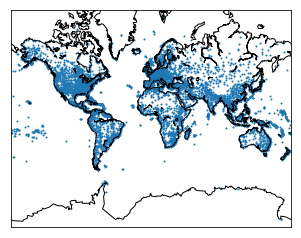

In [9]:
# Displaying coast lines.

m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()


/Users/milesmackenzie/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/milesmackenzie/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


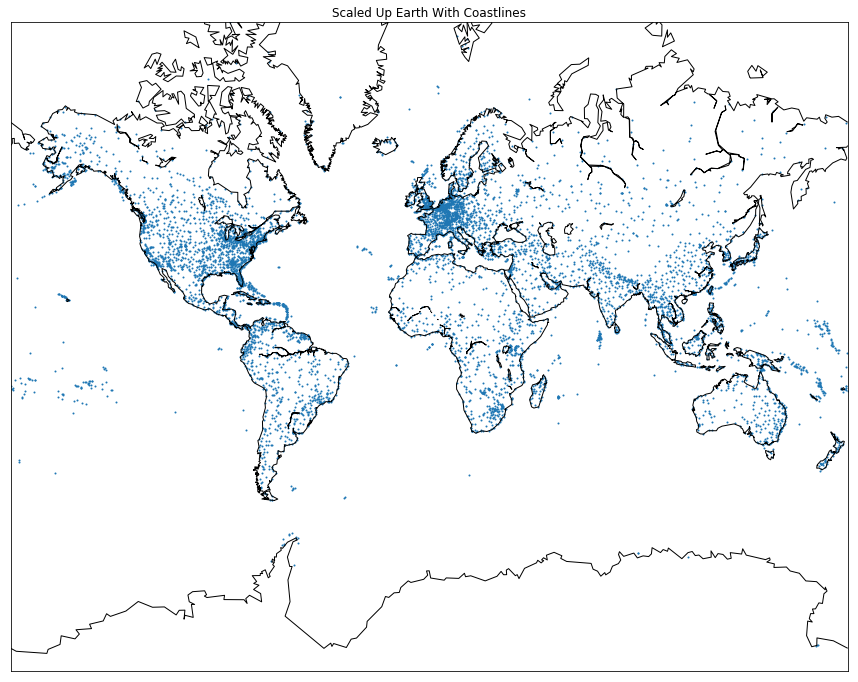

In [10]:
# Interacting with matplotlib.pyplot to assign figure size and set title.

fig = plt.figure(figsize=(15, 20))
plt.title("Scaled Up Earth With Coastlines")
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

In [11]:
# Reading in geo_routes.csv that contains the latitude and longitude 
# values corresponding to the source and destination airports for each route.

geo_routes = pd.read_csv("geo_routes.csv")
geo_routes.info()
print (geo_routes[0:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB
  airline source dest equipment  start_lon    end_lon  start_lat    end_lat
0      2B    AER  KZN       CR2  39.956589  49.278728  43.449928  55.606186
1      2B    ASF  KZN       CR2  48.006278  49.278728  46.283333  55.606186
2      2B    ASF  MRV       CR2  48.006278  43.081889  46.283333  44.225072
3      2B    CEK  KZN       CR2  61.503333  49.278728  55.305836  55.606186
4      2B    CEK  OVB       CR2  61.503333  82.650656  55.305836  55.012622


/Users/milesmackenzie/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/milesmackenzie/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


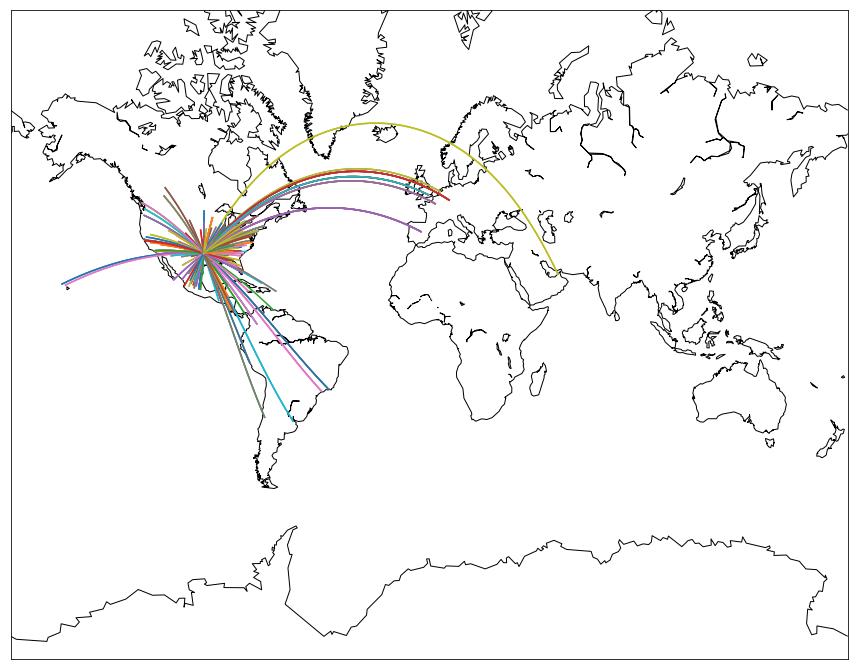

In [13]:
# Writing a function that draws a great circle for each route whos
# absolute differences in longitude and latitude are less that 180.
# Passing DataFrame dfw with only sources from DFW to the function.
# Displayed results

fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(x):
    for idx, i in x.iterrows():
        if abs(i['end_lat'] - i['start_lat']) < 180:
            if abs(i['end_lon'] - i['start_lon']) < 180:

                m.drawgreatcircle(i['start_lon'], i['start_lat'], i['end_lon'], i['end_lat'])
        
dfw = geo_routes[geo_routes["source"] == "DFW"]
create_great_circles(dfw)
plt.show()